In [ ]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

# Ecuaciones de Navier Stokes sin fuerzas externas

Las ecuaciones de Navier-Stokes compresibles se pueden escribir de la siguiente forma

$$\frac{\partial \rho}{\partial t} + \nabla (\rho \underline{u}) = 0$$

$$\frac{\partial \rho \underline{u}}{\partial t} + \nabla (\rho \underline{uu})+\nabla P = \rho\nu \nabla^2 \underline{u} + \rho \underline{F}$$

Donde $\underline{u}$ es el vector de velocidad, $\rho$ la densidad, $\nu$ la viscosidad dinámica, $\underline{F}$ la fuerzas externas por unidad de volumen y $\underline{uu}$ el tensor $(\underline{uu})_{ij}=u_i u_j$

En este notebook tomaremos $F=0$.

La primera de estas ecuaciones es la conservación de la masa y la segunda es la conservación de momento. Para el caso de tratar con liquidos se puede hacer la aproximación de fluido incompesible, es decir la densidad es constante, $\rho = \text{cte}$.

Bajo esta aproximación se las ecuaciones de Navier-Stokes se reducen a las siguientes

$$\nabla \underline{u} = 0$$

$$\frac{\partial \underline{u}}{\partial t} + (\underline{u}|\cdot\nabla) \underline{u}+\frac{1}{\rho}\nabla P = \nu \nabla^2 \underline{u}$$

Resulta que tomando la divergencia de la ecuación de momento se puede mostrar que se obtiene una ecuación de Poisson para la presión cuando se considera el tiempo como continuo.

$$\frac{\partial^2 P}{\partial x^2}+\frac{\partial^2 P}{\partial y^2} = -\rho \left(\left(\frac{\partial u}{\partial x}\right)^2+2\frac{\partial u}{\partial x}\frac{\partial v}{\partial y}+\left(\frac{\partial v}{\partial y}\right)^2 \right)$$

Para el caso discontinuo se llega a otra ecuación que se debe de resolver otra ecuación

$$\frac{\partial^2 P}{\partial x^2}+\frac{\partial^2 P}{\partial y^2} = -\rho \left(\frac{\partial}{\partial t}\left(\frac{\partial u}{\partial x}+\frac{\partial v}{\partial y}\right)+\left(\frac{\partial u}{\partial x}\right)^2+2\frac{\partial u}{\partial x}\frac{\partial v}{\partial y}+\left(\frac{\partial v}{\partial y}\right)^2 \right)$$

Notemos que en el caso discontinuo aparece el término $$\frac{\partial}{\partial t}\left(\frac{\partial u}{\partial x}+\frac{\partial v}{\partial y}\right)$$
Que debería ser cero por la ecuación de continuidad, sin embargo debido a errores numéricos en general $$\frac{\partial u}{\partial x}+\frac{\partial v}{\partial y}\neq 0$$ por lo tanto se debe de tomar en cuenta como término de corrección.

Donde $\underline{u} = (u,v)$

Por lo tanto llegamos a un sistema de ecuaciones diferenciales parciales para nuestras tres variables

$$
\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} + v\frac{\partial u}{\partial x} = -\frac{1}{\rho}\frac{\partial P}{\partial x} + \nu \left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2} \right)\\
\frac{\partial v}{\partial t} + u\frac{\partial v}{\partial x} + v\frac{\partial v}{\partial x} = -\frac{1}{\rho}\frac{\partial P}{\partial y} + \nu \left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2} \right)\\
\frac{\partial^2 P}{\partial x^2}+\frac{\partial^2 P}{\partial y^2} = -\rho \left(\left(\frac{\partial u}{\partial x}\right)^2+2\frac{\partial u}{\partial x}\frac{\partial v}{\partial y}+\left(\frac{\partial v}{\partial y}\right)^2 \right)$$


### Observación
Notemos que las variables que tenemos, $\underline{u}$, $P$ y $\underline{x}$ tienen unidades de velocidad, presión y longitud. Tomando cantidades caracteristicas del sistema, como tamaño en donde ocurren los cambios, $d$ y velocidad media del fluido, $U$, se pueden adimensionalizar las ecuaciones de Navier-Stokes, de la siguiente forma, $\underline{u'}=\frac{1}{U}\underline{u}$, $\underline{x'}=\frac{1}{d}\underline{x}$ y $p =\frac{d}{\rho \nu V}P$
Eliminando las primas para no cargar con la notación las ecuaciones quedan como

$$\nabla \underline{u} = 0$$
$$\frac{\partial \underline{u}}{\partial t} + (\underline{u}\cdot\nabla) (\underline{u})=-\nabla p +\frac{1}{Re} \nabla^2 \underline{u} + \frac{d}{U^2}\underline{F}$$

Donde $Re$ es el número de Reynolds y está defino como $Re = \frac{\rho d U}{\nu}$ determina el dominio de las fuerzas de inercia o de la fuerza viscosa.


Discretizando las ecuaciones para $u$, $v$ y $P$ tenemos

Para $u$

$$
\frac{u_{(i,j)}^{n+1}-u_{(i,j)}^{n}}{\Delta t} + u_{(i,j)}^{n}\frac{u_{(i,j)}^{n}-u_{(i-1,j)}^{n}}{\Delta x} + v_{(i,j)}^{n}\frac{u_{(i,j)}^{n}-u_{(i,j-1)}^{n}}{\Delta y} = -\frac{1}{\rho}\frac{P_{(i+1,j)}^{n}-P_{(i-1,j)}^{n}}{2\Delta x} + \nu \left(\frac{u_{(i+1,j)}^{n}+u_{(i-1,j)}^{n}-2u_{(i,j)}^{n}}{\Delta x^2} +\frac{u_{(i,j+1)}^{n}+u_{(i,j-1)}^{n}-2u_{(i,j)}^{n}}{\Delta y^2} \right)
$$

Para $v$

$$
\frac{v_{(i,j)}^{n+1}-v_{(i,j)}^{n}}{\Delta t} + u_{(i,j)}^{n}\frac{v_{(i,j)}^{n}-v_{(i-1,j)}^{n}}{\Delta x} + v_{(i,j)}^{n}\frac{v_{(i,j)}^{n}-v_{(i,j-1)}^{n}}{\Delta y} = -\frac{1}{\rho}\frac{P_{(i+1,j)}^{n}-P_{(i,j-1)}^{n}}{2\Delta y} + \nu \left(\frac{v_{(i+1,j)}^{n}+v_{(i-1,j)}^{n}-2v_{(i,j)}^{n}}{\Delta x^2} +\frac{v_{(i,j+1)}^{n}+v_{(i,j-1)}^{n}-2v_{(i,j)}^{n}}{\Delta y^2} \right)
$$

Para $P$

$$ \frac{P_{i+1,j}^{n}-2P_{i,j}^{n}+P_{i-1,j}^{n}}{\Delta x^2}+\frac{P_{i,j+1}^{n}-2p_{i,j}^{n}+P_{i,j-1}^{n}}{\Delta y^2} 
=\rho\left[\frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right)\right.$$

$$-\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}
- \ 2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x}
-\left.\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]
$$

Por lo tanto si despejamos de las ecuaciones de momento $u_{(i,j)}^{n+1}$ y $v_{(i,j)}^{n+1}$ podremos calcular la evolución temporal de $u$ y $v$ y para el caso de la presión se debe de calcular la condición de estabilidad para $P_{(i,j)}^{n}$.


Por lo tanto despejando de las ecuaciones anteriores tenemos:
Para $u$

$$
u_{i,j}^{n+1} = u_{i,j}^{n} - u_{i,j}^{n}\frac{\Delta t}{\Delta x}(u_{i,j}^{n}-u_{i-1,j}^{n})- v_{i,j}^{n}\frac{\Delta t}{\Delta y}(u_{i,j}^{n}-u_{i,j-1}^{n})$$
$$-\frac{\Delta t}{ 2\rho \Delta x}(P_{i+1,j}^{n}-P_{i-1,j}^{n})
+\nu\left(\frac{\Delta t}{\Delta x^2}(u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n})\right.
+\left.\frac{\Delta t}{\Delta y^2}(u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n})\right)
$$

Para $v$

$$
v_{i,j}^{n+1} = v_{i,j}^{n} - u_{i,j}^{n}\frac{\Delta t}{\Delta x}(v_{i,j}^{n}-v_{i-1,j}^{n})- v_{i,j}^{n}\frac{\Delta t}{\Delta y}(v_{i,j}^{n}-v_{i,j-1}^{n})$$
$$-\frac{\Delta t}{ 2\rho \Delta y}(P_{i,j+1}^{n}-P_{i,j-1}^{n})
+\nu\left(\frac{\Delta t}{\Delta x^2}(v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n})\right.
+\left.\frac{\Delta t}{\Delta y^2}(v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n})\right)
$$

Para $P$


$$
P_{i,j}^{n}=\frac{(P_{i+1,j}^{n}+P_{i-1,j}^{n})\Delta y^2+(P_{i,j+1}^{n}+P_{i,j-1}^{n})\Delta x^2}{2(\Delta x^2+\Delta y^2)}-\frac{\rho\Delta x^2\Delta y^2}{2(\Delta x^2+\Delta y^2)} \times$$

$$\left[\frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right)-\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\right. $$

$$ -2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x}-\left.\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]$$

In [1]:
#Se importan las librerias necesarias
from numpy import *
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Para el caso de la ecuación de Poisson creamos una función que nos da el término no homogeneo, es decir 
$$-\rho \left(\frac{\partial}{\partial t}\left(\frac{\partial u}{\partial x}+\frac{\partial v}{\partial y}\right)+\left(\frac{\partial u}{\partial x}\right)^2+2\frac{\partial u}{\partial x}\frac{\partial v}{\partial y}+\left(\frac{\partial v}{\partial y}\right)^2 \right)$$

In [42]:
def poisson_ext(f, rho, u, v, dx, dy, dt):
    f[1:-1, 1:-1] = -rho*(  ((u[2:,1:-1]-u[0:-2,1:-1])/dx+(v[1:-1,2:]-v[1:-1,0:-2])/dy)/(2.*dt)-\
                            ((u[2:,1:-1]-u[0:-2,1:-1])/(2.*dx))**2-((v[1:-1,2:]-v[1:-1,0:-2])/(2.*dy))**2-\
                            2*((u[2:,1:-1]-u[0:-2,1:-1])/(2.*dx))*((v[1:-1,2:]-v[1:-1,0:-2])/(2.*dy))
                        )
    return f

Retomemos la función construida anteriormente para resolver la ecuación de Poisson

In [43]:
def poisson_rec(p0, x, y, dx, dy, n_iteraciones, cond_frontera, f):
    p = p0.copy()
    pn = empty_like(p0)
    
    for i in range(n_iteraciones):
        pn = p.copy()
        #Se aplica la condicion de estabilidad en el interior del dominio
        p[1:-1,1:-1] = ( dy**2*(pn[2:,1:-1]+pn[0:-2,1:-1]) + dx**2*(pn[1:-1,2:]+pn[1:-1,0:-2]) +\
                        dx**2 *dy**2 *f[1:-1,1:-1] )/(2*(dx**2+dy**2))
        
        #Se aplican las condiciones de frontera
        p = cond_frontera(p, x, y)

    return pn

Recordando que tenemos

Para $u$

$$
u_{i,j}^{n+1} = u_{i,j}^{n} - u_{i,j}^{n}\frac{\Delta t}{\Delta x}(u_{i,j}^{n}-u_{i-1,j}^{n})- v_{i,j}^{n}\frac{\Delta t}{\Delta y}(u_{i,j}^{n}-u_{i,j-1}^{n})$$
$$-\frac{\Delta t}{ 2\rho \Delta x}(P_{i+1,j}^{n}-P_{i-1,j}^{n})
+\nu\left(\frac{\Delta t}{\Delta x^2}(u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n})\right.
+\left.\frac{\Delta t}{\Delta y^2}(u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n})\right)
$$

Para $v$

$$
v_{i,j}^{n+1} = v_{i,j}^{n} - u_{i,j}^{n}\frac{\Delta t}{\Delta x}(v_{i,j}^{n}-v_{i-1,j}^{n})- v_{i,j}^{n}\frac{\Delta t}{\Delta y}(v_{i,j}^{n}-v_{i,j-1}^{n})$$
$$-\frac{\Delta t}{ 2\rho \Delta y}(P_{i,j+1}^{n}-P_{i,j-1}^{n})
+\nu\left(\frac{\Delta t}{\Delta x^2}(v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n})\right.
+\left.\frac{\Delta t}{\Delta y^2}(v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n})\right)
$$

Definimos las funciones que nos definen esta discretización.

In [44]:
def discret_u(un, vn, Pn, dt, dx, dy, x, y, nx, ny, cond_frontU, rho, nu):
    U = zeros((nx, ny))
    U[1:-1,1:-1] = un[1:-1,1:-1]-(dt/dx)*un[1:-1,1:-1]*(un[1:-1,1:-1]-un[1:-1,0:-2])\
            -(dt/dy)*vn[1:-1,1:-1]*(un[1:-1,1:-1]-un[0:-2,1:-1])\
            +(nu*dt/dx**2)*(un[1:-1,2:]-2*un[1:-1,1:-1]+un[1:-1,0:-2])\
            +(nu*dt/dy**2)*(un[2:,1:-1]-2*un[1:-1,1:-1]+un[0:-2,1:-1])\
            -(dt/(2*rho*dx))*(Pn[2:,1:-1]-Pn[0:-2,1:-1])
    U = cond_frontU(U, x, y)
    return U

def discret_v(un, vn, Pn, dt, dx, dy, x, y, nx, ny, cond_frontV, rho, nu):
    V = zeros((nx, ny))
    V[1:-1,1:-1] = vn[1:-1,1:-1]-(dt/dx)*un[1:-1,1:-1]*(vn[1:-1,1:-1]-vn[1:-1,0:-2])\
            -(dt/dy)*vn[1:-1,1:-1]*(vn[1:-1,1:-1]-vn[0:-2,1:-1])\
            +(nu*dt/dx**2)*(vn[1:-1,2:]-2*vn[1:-1,1:-1]+vn[1:-1,0:-2])\
            +(nu*dt/dy**2)*(vn[2:,1:-1]-2*vn[1:-1,1:-1]+vn[0:-2,1:-1])\
            -(dt/(2*rho*dy))*(Pn[1:-1,2:]-Pn[1:-1,0:-2])
    V = cond_frontV(V, x, y)
    return V

A continuación definimos la función que calcula la evolución temporal de las ecuaciones de Navier-Stokes

In [55]:
def avance_en_tiempo(u0, v0, p0, cond_frontU, cond_frontV, cond_frontP, nt, nx, ny, dx, dy, x, y, sigma, n_iteraciones):
    nu = 0.2
    rho = 1.
    t = 0
    
    un = ones((nx, ny))
    vn = ones((nx, ny))
    Pn = ones((nx, ny))
    
    f = zeros((nx, ny))
    
    u = u0
    v = v0
    P = p0
    
    for n in range(nt):
        if amax(un)==0:
            if amax(vn)==0:
                dt = sigma*min((dx**2)/nu,(dy**2)/nu,(dx*dy)/nu, 2.*rho*dy)
            else:
                dt = sigma*min((dx**2)/nu,(dy**2)/nu,(dx*dy)/nu,dy/amax(vn), 2.*rho*dy)
        else:
            if amax(vn)==0:
                dt = sigma*min((dx**2)/nu,(dy**2)/nu,(dx*dy)/nu,dx/amax(un), 2.*rho*dy)
            else:
                dt = sigma*min((dx**2)/nu,(dy**2)/nu,(dx*dy)/nu,dx/amax(un),dy/amax(vn), 2.*rho*dy)
            
            
        t = t+dt
        
        #Se copia el valor de la funcion u en el arreglo un
        un = u.copy()
        vn = v.copy()
        Pn = P.copy()
        
        #Para cada punto en el espacio se calcula el valor 
        #de la funcion en el tiempo siguiente
    
        f = poisson_ext(f, rho, un, vn, dx, dy, dt)
        
        P = poisson_rec(Pn, x, y, dx, dy, n_iteraciones, cond_frontP, f)
        
        u = discret_u(un, vn, Pn, dt, dx, dy, x, y, nx, ny, cond_frontU, rho, nu)
        
        v = discret_v(un, vn, Pn, dt, dx, dy, x, y, nx, ny, cond_frontV, rho, nu)
        
    return u, v, P, t

Tomemos como condiciones iniciales $u, v, p = 0$ en todas partes del rectangulo $(0,1)\times(0,1)$ y con condiciones de frontera

Para $u$:

$$u=1 \text{ si } y=1$$
$$u=0 \text{  en todas las demás fronteras}$$

Para $v$:
$$v=0 \text{ en toda la frontera}$$

Para $P$:

$$\frac{\partial p}{\partial y}=0 \text{ si }y=0$$

$$p=0 \text{ si } y=1$$

$$\frac{\partial p}{\partial x}=0 \text{ si } x=0,1$$


In [63]:
def cond_front_u(u, x, y):
    u[:, 0] = 0   # en y=0
    u[:, -1] = 1  # en y=1
    u[0,:] = 0    # en x=0
    u[-1,:] = 0   # en x=1
    return u

def cond_front_v(v, x, y):
    v[:, 0] = 0   # en y=0
    v[:, -1] = 0  # en y=1
    v[0,:] = 0    # en x=0
    v[-1,:] = 0   # en x=1
    return v

def cond_front_p(p, x, y):
    p[:, 0] = p[:, 1]   # en y=0
    p[:, -1] = 0        # en y=1
    p[0,:] = p[1,:]     # en x=0
    p[-1,:] = p[-2,:]   # en x=1
    return p 

nx = 41
ny = 41
nt = 500
dx = 1./(nx-1)
dy = 1./(ny-1)

sigma = 0.2
n_iteraciones = 1000

x = linspace(0., 1., nx)
y = linspace(0., 1., ny)
X, Y = meshgrid(x, y)

#Se define un arreglo de puros ceros
u0 = zeros((nx, ny))
v0 = zeros((nx, ny))
p0 = zeros((nx, ny))

#Se imponen las condiciones de frontera
u0 = cond_front_u(u0, x, y)
v0 = cond_front_v(v0, x, y)
p0 = cond_front_p(p0, x, y)

U, V, P, t = avance_en_tiempo(u0, v0, p0, cond_front_u, cond_front_v, cond_front_p, 
                              nt, nx, ny, dx, dy, x, y, sigma, n_iteraciones)

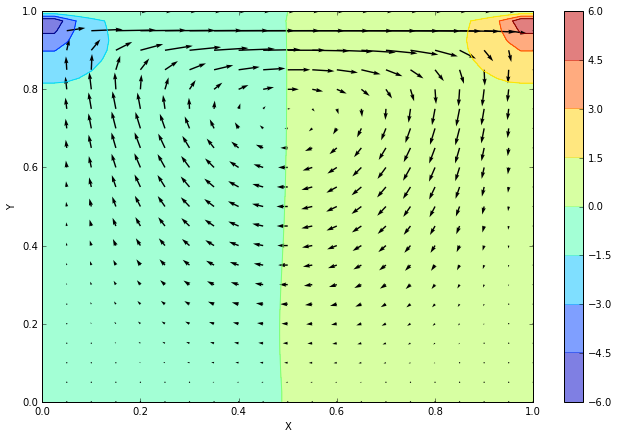

In [64]:
fig = figure(figsize=(11,7), dpi=100)
contourf(Y, X, P, alpha=0.5)
colorbar()
contour(Y, X, P)
quiver(Y[::2,::2], X[::2,::2], U[::2,::2], V[::2,::2])
xlabel('X')
ylabel('Y');